## 1. 라이브러리 

In [98]:
import pandas as pd
import datetime

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

#ggplot 스타일은 격자로 숫자범위가 나타남
# plt.style.use('ggplot')

#그래프에서 마이너스 폰트가 깨지는 문제 대처
mpl.rcParams['axes.unicode_minus']=False

In [99]:
#한글 폰트 깨짐문제 대처
import platform
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "C:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')

## 2. 데이터 로드

In [100]:
solar = pd.read_excel('solar.xls')
wando = pd.read_csv('wando_original.csv', encoding='cp949')
# wando = pd.read_csv('wando.csv', encoding='utf-8')
    

In [101]:
solar.head(1)

,날짜,구분,5Hr,6Hr,7Hr,8Hr,9Hr,10Hr,11Hr,12Hr,13Hr,14Hr,15Hr,16Hr,17Hr,18Hr,19Hr,20Hr,충전시간발전량
0,2016-07-01,INV1,0.0,2.5,36.9,44.4,29.2,59.3,33.9,9.2,28.4,1.3,1.1,7.3,1.5,0.2,0.0,0,140.5


In [102]:
solar.tail(1)

,날짜,구분,5Hr,6Hr,7Hr,8Hr,9Hr,10Hr,11Hr,12Hr,13Hr,14Hr,15Hr,16Hr,17Hr,18Hr,19Hr,20Hr,충전시간발전량
381,2017-07-17,INV1,0.0,8.0,81.9,172.7,230.4,178.9,228.4,189.1,195.4,142.2,100.6,57.5,22.3,6.4,0.0,0,1092.1


## 3. 전처리

In [103]:
solar_y = solar[['충전시간발전량']]

In [104]:
solar_y.isnull().sum()

충전시간발전량    0
dtype: int64

In [105]:
wando.head(1)

,지점,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),...,평균 증기압(hPa),평균 현지기압(hPa),최고 해면기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),합계 일조 시간(hr),최저 초상온도(°C)
0,170,2016-01-01,4.6,-0.4,800,8.8,1423,NaN,NaN,NaN,...,6.7,1027.2,1034.7,1034,1028.7,2400,1031.6,9.9,8.4,-1.7


In [106]:
wando.tail(1)

,지점,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),...,평균 증기압(hPa),평균 현지기압(hPa),최고 해면기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),합계 일조 시간(hr),최저 초상온도(°C)
563,170,2017-07-17,28.1,26.1,2147,30.5,1220,NaN,0.7,1707.0,...,35.7,1008.9,1014.0,2,1011.8,1934,1012.9,14.2,4.1,24.9


In [107]:
# wando['일시'] = pd.to_datetime(wando['일시'])

In [108]:
wando[wando['일시']=='2016-07-01']

,지점,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),...,평균 증기압(hPa),평균 현지기압(hPa),최고 해면기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),합계 일조 시간(hr),최저 초상온도(°C)
182,170,2016-07-01,23.9,21.5,1,26.2,1814,NaN,11.5,1149.0,...,29.4,1003.3,1011.6,1,1004.9,2021,1007.3,14.4,0.0,22.3


In [109]:
wando = wando.iloc[182:]

In [110]:
wando.head()

,지점,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),...,평균 증기압(hPa),평균 현지기압(hPa),최고 해면기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),합계 일조 시간(hr),최저 초상온도(°C)
182,170,2016-07-01,23.9,21.5,1,26.2,1814,NaN,11.5,1149.0,...,29.4,1003.3,1011.6,1,1004.9,2021,1007.3,14.4,0.0,22.3
183,170,2016-07-02,23.0,21.6,1142,26.0,1,NaN,11.6,1231.0,...,27.8,1002.3,1008.7,2337,1003.8,211,1006.3,14.4,0.4,22.1
184,170,2016-07-03,21.0,20.1,1530,22.9,57,NaN,3.8,2157.0,...,24.5,1005.5,1011.4,856,1008.1,1822,1009.6,14.4,0.0,20.8
185,170,2016-07-04,25.2,21.2,1,29.6,1554,NaN,0.1,NaN,...,31.8,1005.9,1011.6,2331,1008.6,308,1009.9,14.4,2.4,21.7
186,170,2016-07-05,27.6,22.4,249,31.3,1156,NaN,0.1,1459.0,...,35.5,1008.4,1014.0,2305,1011.3,433,1012.4,14.4,8.2,23.3


In [111]:
wando.drop('지점', axis=1, inplace = True)

In [112]:
wando.reset_index(drop=True, inplace=True)

In [113]:
wando.head(1)

,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),1시간 최다강수량(mm),...,평균 증기압(hPa),평균 현지기압(hPa),최고 해면기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),합계 일조 시간(hr),최저 초상온도(°C)
0,2016-07-01,23.9,21.5,1,26.2,1814,NaN,11.5,1149.0,21.1,...,29.4,1003.3,1011.6,1,1004.9,2021,1007.3,14.4,0.0,22.3


In [114]:
wando.tail(1)

,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),1시간 최다강수량(mm),...,평균 증기압(hPa),평균 현지기압(hPa),최고 해면기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),합계 일조 시간(hr),최저 초상온도(°C)
381,2017-07-17,28.1,26.1,2147,30.5,1220,NaN,0.7,1707.0,0.7,...,35.7,1008.9,1014.0,2,1011.8,1934,1012.9,14.2,4.1,24.9


In [115]:
wando.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 34 columns):
일시                     382 non-null object
평균기온(°C)               382 non-null float64
최저기온(°C)               382 non-null float64
최저기온 시각(hhmi)          382 non-null int64
최고기온(°C)               381 non-null float64
최고기온 시각(hhmi)          382 non-null int64
강수 계속시간(hr)            0 non-null float64
10분 최다 강수량(mm)         89 non-null float64
10분 최다강수량 시각(hhmi)     56 non-null float64
1시간 최다강수량(mm)          89 non-null float64
1시간 최다 강수량 시각(hhmi)    61 non-null float64
일강수량(mm)               158 non-null float64
최대 순간 풍속(m/s)          382 non-null float64
최대 순간 풍속 풍향(16방위)      382 non-null int64
최대 순간풍속 시각(hhmi)       382 non-null int64
최대 풍속(m/s)             382 non-null float64
최대 풍속 풍향(16방위)         382 non-null int64
최대 풍속 시각(hhmi)         382 non-null int64
평균 풍속(m/s)             382 non-null float64
풍정합(100m)              382 non-null int64
평균 이슬점온도(°C)           382 non-null 

In [116]:
wando.head()

,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),1시간 최다강수량(mm),...,평균 증기압(hPa),평균 현지기압(hPa),최고 해면기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),합계 일조 시간(hr),최저 초상온도(°C)
0,2016-07-01,23.9,21.5,1,26.2,1814,NaN,11.5,1149.0,21.1,...,29.4,1003.3,1011.6,1,1004.9,2021,1007.3,14.4,0.0,22.3
1,2016-07-02,23.0,21.6,1142,26.0,1,NaN,11.6,1231.0,36.4,...,27.8,1002.3,1008.7,2337,1003.8,211,1006.3,14.4,0.4,22.1
2,2016-07-03,21.0,20.1,1530,22.9,57,NaN,3.8,2157.0,10.6,...,24.5,1005.5,1011.4,856,1008.1,1822,1009.6,14.4,0.0,20.8
3,2016-07-04,25.2,21.2,1,29.6,1554,NaN,0.1,NaN,0.1,...,31.8,1005.9,1011.6,2331,1008.6,308,1009.9,14.4,2.4,21.7
4,2016-07-05,27.6,22.4,249,31.3,1156,NaN,0.1,1459.0,0.1,...,35.5,1008.4,1014.0,2305,1011.3,433,1012.4,14.4,8.2,23.3


In [117]:
wando.isnull().sum()

일시                       0
평균기온(°C)                 0
최저기온(°C)                 0
최저기온 시각(hhmi)            0
최고기온(°C)                 1
최고기온 시각(hhmi)            0
강수 계속시간(hr)            382
10분 최다 강수량(mm)         293
10분 최다강수량 시각(hhmi)     326
1시간 최다강수량(mm)          293
1시간 최다 강수량 시각(hhmi)    321
일강수량(mm)               224
최대 순간 풍속(m/s)            0
최대 순간 풍속 풍향(16방위)        0
최대 순간풍속 시각(hhmi)         0
최대 풍속(m/s)               0
최대 풍속 풍향(16방위)           0
최대 풍속 시각(hhmi)           0
평균 풍속(m/s)               0
풍정합(100m)                0
평균 이슬점온도(°C)             0
최소 상대습도(%)               0
최소 상대습도 시각(hhmi)         0
평균 상대습도(%)               0
평균 증기압(hPa)              0
평균 현지기압(hPa)             0
최고 해면기압(hPa)             0
최고 해면기압 시각(hhmi)         0
최저 해면기압(hPa)             0
최저 해면기압 시각(hhmi)         0
평균 해면기압(hPa)             0
가조시간(hr)                 0
합계 일조 시간(hr)             0
최저 초상온도(°C)              0
dtype: int64

    강수 계속시간(hr)            382
    10분 최다 강수량(mm)         293
    10분 최다강수량 시각(hhmi)     326
    1시간 최다강수량(mm)          293
    1시간 최다 강수량 시각(hhmi)    321
    날리기. 데이터가 너무 적다.
    
    반면, 일강수량(mm)               224
    일강수량의 nan값은 0 으로

### [3-2]Null 값 인덱스 찾기

In [118]:
wando[wando['최고기온(°C)'].isnull()].index

Int64Index([175], dtype='int64')

In [119]:
wando['최고기온(°C)'][170:180]

170    12.1
171    11.4
172    14.2
173    20.2
174    20.2
175     NaN
176     6.8
177     9.9
178     9.3
179     6.5
Name: 최고기온(°C), dtype: float64

In [120]:
wando['최고기온(°C)'][175] = 13.5

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### [3-3] Null 값 모두 나타내기

In [121]:
# wando[wando.isnull().any(axis=1)] 

### [3-4] 결측치 처리 : fillna

강수량 nan 값은 0mm 이었음. 따라서 fillna(0)

In [122]:
wando['일강수량(mm)'] = wando['일강수량(mm)'].fillna(0)

In [123]:
wando.head()

,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),1시간 최다강수량(mm),...,평균 증기압(hPa),평균 현지기압(hPa),최고 해면기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),합계 일조 시간(hr),최저 초상온도(°C)
0,2016-07-01,23.9,21.5,1,26.2,1814,NaN,11.5,1149.0,21.1,...,29.4,1003.3,1011.6,1,1004.9,2021,1007.3,14.4,0.0,22.3
1,2016-07-02,23.0,21.6,1142,26.0,1,NaN,11.6,1231.0,36.4,...,27.8,1002.3,1008.7,2337,1003.8,211,1006.3,14.4,0.4,22.1
2,2016-07-03,21.0,20.1,1530,22.9,57,NaN,3.8,2157.0,10.6,...,24.5,1005.5,1011.4,856,1008.1,1822,1009.6,14.4,0.0,20.8
3,2016-07-04,25.2,21.2,1,29.6,1554,NaN,0.1,NaN,0.1,...,31.8,1005.9,1011.6,2331,1008.6,308,1009.9,14.4,2.4,21.7
4,2016-07-05,27.6,22.4,249,31.3,1156,NaN,0.1,1459.0,0.1,...,35.5,1008.4,1014.0,2305,1011.3,433,1012.4,14.4,8.2,23.3


    강수 계속시간(hr)            382
    10분 최다 강수량(mm)         293
    10분 최다강수량 시각(hhmi)     326
    1시간 최다강수량(mm)          293
    1시간 최다 강수량 시각(hhmi)    321
    날리기. 데이터가 너무 적다.

In [124]:
wando.columns

Index(['일시', '평균기온(°C)', '최저기온(°C)', '최저기온 시각(hhmi)', '최고기온(°C)',
       '최고기온 시각(hhmi)', '강수 계속시간(hr)', '10분 최다 강수량(mm)', '10분 최다강수량 시각(hhmi)',
       '1시간 최다강수량(mm)', '1시간 최다 강수량 시각(hhmi)', '일강수량(mm)', '최대 순간 풍속(m/s)',
       '최대 순간 풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '평균 풍속(m/s)', '풍정합(100m)', '평균 이슬점온도(°C)',
       '최소 상대습도(%)', '최소 상대습도 시각(hhmi)', '평균 상대습도(%)', '평균 증기압(hPa)',
       '평균 현지기압(hPa)', '최고 해면기압(hPa)', '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)',
       '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)', '가조시간(hr)', '합계 일조 시간(hr)',
       '최저 초상온도(°C)'],
      dtype='object')

In [125]:
wando.drop(['일시','강수 계속시간(hr)', '10분 최다 강수량(mm)', '10분 최다강수량 시각(hhmi)','1시간 최다강수량(mm)', '1시간 최다 강수량 시각(hhmi)'], axis =1, inplace=True)

In [126]:
wando.columns

Index(['평균기온(°C)', '최저기온(°C)', '최저기온 시각(hhmi)', '최고기온(°C)', '최고기온 시각(hhmi)',
       '일강수량(mm)', '최대 순간 풍속(m/s)', '최대 순간 풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)',
       '최대 풍속(m/s)', '최대 풍속 풍향(16방위)', '최대 풍속 시각(hhmi)', '평균 풍속(m/s)',
       '풍정합(100m)', '평균 이슬점온도(°C)', '최소 상대습도(%)', '최소 상대습도 시각(hhmi)',
       '평균 상대습도(%)', '평균 증기압(hPa)', '평균 현지기압(hPa)', '최고 해면기압(hPa)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)',
       '가조시간(hr)', '합계 일조 시간(hr)', '최저 초상온도(°C)'],
      dtype='object')

In [127]:
wando.head(2)

,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),일강수량(mm),최대 순간 풍속(m/s),최대 순간 풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),...,평균 증기압(hPa),평균 현지기압(hPa),최고 해면기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),합계 일조 시간(hr),최저 초상온도(°C)
0,23.9,21.5,1,26.2,1814,51.2,15.7,160,2353,9.2,...,29.4,1003.3,1011.6,1,1004.9,2021,1007.3,14.4,0.0,22.3
1,23.0,21.6,1142,26.0,1,55.7,21.5,180,226,10.4,...,27.8,1002.3,1008.7,2337,1003.8,211,1006.3,14.4,0.4,22.1


In [128]:
wando.head()

,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),일강수량(mm),최대 순간 풍속(m/s),최대 순간 풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),...,평균 증기압(hPa),평균 현지기압(hPa),최고 해면기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),합계 일조 시간(hr),최저 초상온도(°C)
0,23.9,21.5,1,26.2,1814,51.2,15.7,160,2353,9.2,...,29.4,1003.3,1011.6,1,1004.9,2021,1007.3,14.4,0.0,22.3
1,23.0,21.6,1142,26.0,1,55.7,21.5,180,226,10.4,...,27.8,1002.3,1008.7,2337,1003.8,211,1006.3,14.4,0.4,22.1
2,21.0,20.1,1530,22.9,57,44.9,6.9,70,1623,5.2,...,24.5,1005.5,1011.4,856,1008.1,1822,1009.6,14.4,0.0,20.8
3,25.2,21.2,1,29.6,1554,0.4,11.3,90,1902,6.0,...,31.8,1005.9,1011.6,2331,1008.6,308,1009.9,14.4,2.4,21.7
4,27.6,22.4,249,31.3,1156,0.1,11.8,110,1010,6.6,...,35.5,1008.4,1014.0,2305,1011.3,433,1012.4,14.4,8.2,23.3


In [129]:
len(wando)

382

In [172]:
len(solar_y)

382

In [173]:
wando.head()

,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),일강수량(mm),최대 순간 풍속(m/s),최대 순간 풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),...,평균 증기압(hPa),평균 현지기압(hPa),최고 해면기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),합계 일조 시간(hr),최저 초상온도(°C)
0,23.9,21.5,1,26.2,1814,51.2,15.7,160,2353,9.2,...,29.4,1003.3,1011.6,1,1004.9,2021,1007.3,14.4,0.0,22.3
1,23.0,21.6,1142,26.0,1,55.7,21.5,180,226,10.4,...,27.8,1002.3,1008.7,2337,1003.8,211,1006.3,14.4,0.4,22.1
2,21.0,20.1,1530,22.9,57,44.9,6.9,70,1623,5.2,...,24.5,1005.5,1011.4,856,1008.1,1822,1009.6,14.4,0.0,20.8
3,25.2,21.2,1,29.6,1554,0.4,11.3,90,1902,6.0,...,31.8,1005.9,1011.6,2331,1008.6,308,1009.9,14.4,2.4,21.7
4,27.6,22.4,249,31.3,1156,0.1,11.8,110,1010,6.6,...,35.5,1008.4,1014.0,2305,1011.3,433,1012.4,14.4,8.2,23.3


In [414]:
wando.reset_index(drop = True).head()

,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),일강수량(mm),최대 순간 풍속(m/s),최대 순간 풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),...,평균 증기압(hPa),평균 현지기압(hPa),최고 해면기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),합계 일조 시간(hr),최저 초상온도(°C)
0,23.9,21.5,1,26.2,1814,51.2,15.7,160,2353,9.2,...,29.4,1003.3,1011.6,1,1004.9,2021,1007.3,14.4,0.0,22.3
1,23.0,21.6,1142,26.0,1,55.7,21.5,180,226,10.4,...,27.8,1002.3,1008.7,2337,1003.8,211,1006.3,14.4,0.4,22.1
2,21.0,20.1,1530,22.9,57,44.9,6.9,70,1623,5.2,...,24.5,1005.5,1011.4,856,1008.1,1822,1009.6,14.4,0.0,20.8
3,25.2,21.2,1,29.6,1554,0.4,11.3,90,1902,6.0,...,31.8,1005.9,1011.6,2331,1008.6,308,1009.9,14.4,2.4,21.7
4,27.6,22.4,249,31.3,1156,0.1,11.8,110,1010,6.6,...,35.5,1008.4,1014.0,2305,1011.3,433,1012.4,14.4,8.2,23.3


### [3-6] CSV 저장하기

In [175]:
wando.to_csv('완도기상데이터 전처리.csv', index = False)

In [176]:
wando.head()

,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),일강수량(mm),최대 순간 풍속(m/s),최대 순간 풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),...,평균 증기압(hPa),평균 현지기압(hPa),최고 해면기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),합계 일조 시간(hr),최저 초상온도(°C)
0,23.9,21.5,1,26.2,1814,51.2,15.7,160,2353,9.2,...,29.4,1003.3,1011.6,1,1004.9,2021,1007.3,14.4,0.0,22.3
1,23.0,21.6,1142,26.0,1,55.7,21.5,180,226,10.4,...,27.8,1002.3,1008.7,2337,1003.8,211,1006.3,14.4,0.4,22.1
2,21.0,20.1,1530,22.9,57,44.9,6.9,70,1623,5.2,...,24.5,1005.5,1011.4,856,1008.1,1822,1009.6,14.4,0.0,20.8
3,25.2,21.2,1,29.6,1554,0.4,11.3,90,1902,6.0,...,31.8,1005.9,1011.6,2331,1008.6,308,1009.9,14.4,2.4,21.7
4,27.6,22.4,249,31.3,1156,0.1,11.8,110,1010,6.6,...,35.5,1008.4,1014.0,2305,1011.3,433,1012.4,14.4,8.2,23.3


## 4. 시각화

In [177]:
corrMatt = wando.corr()

In [178]:
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False # 이건 무슨 뜻일까?

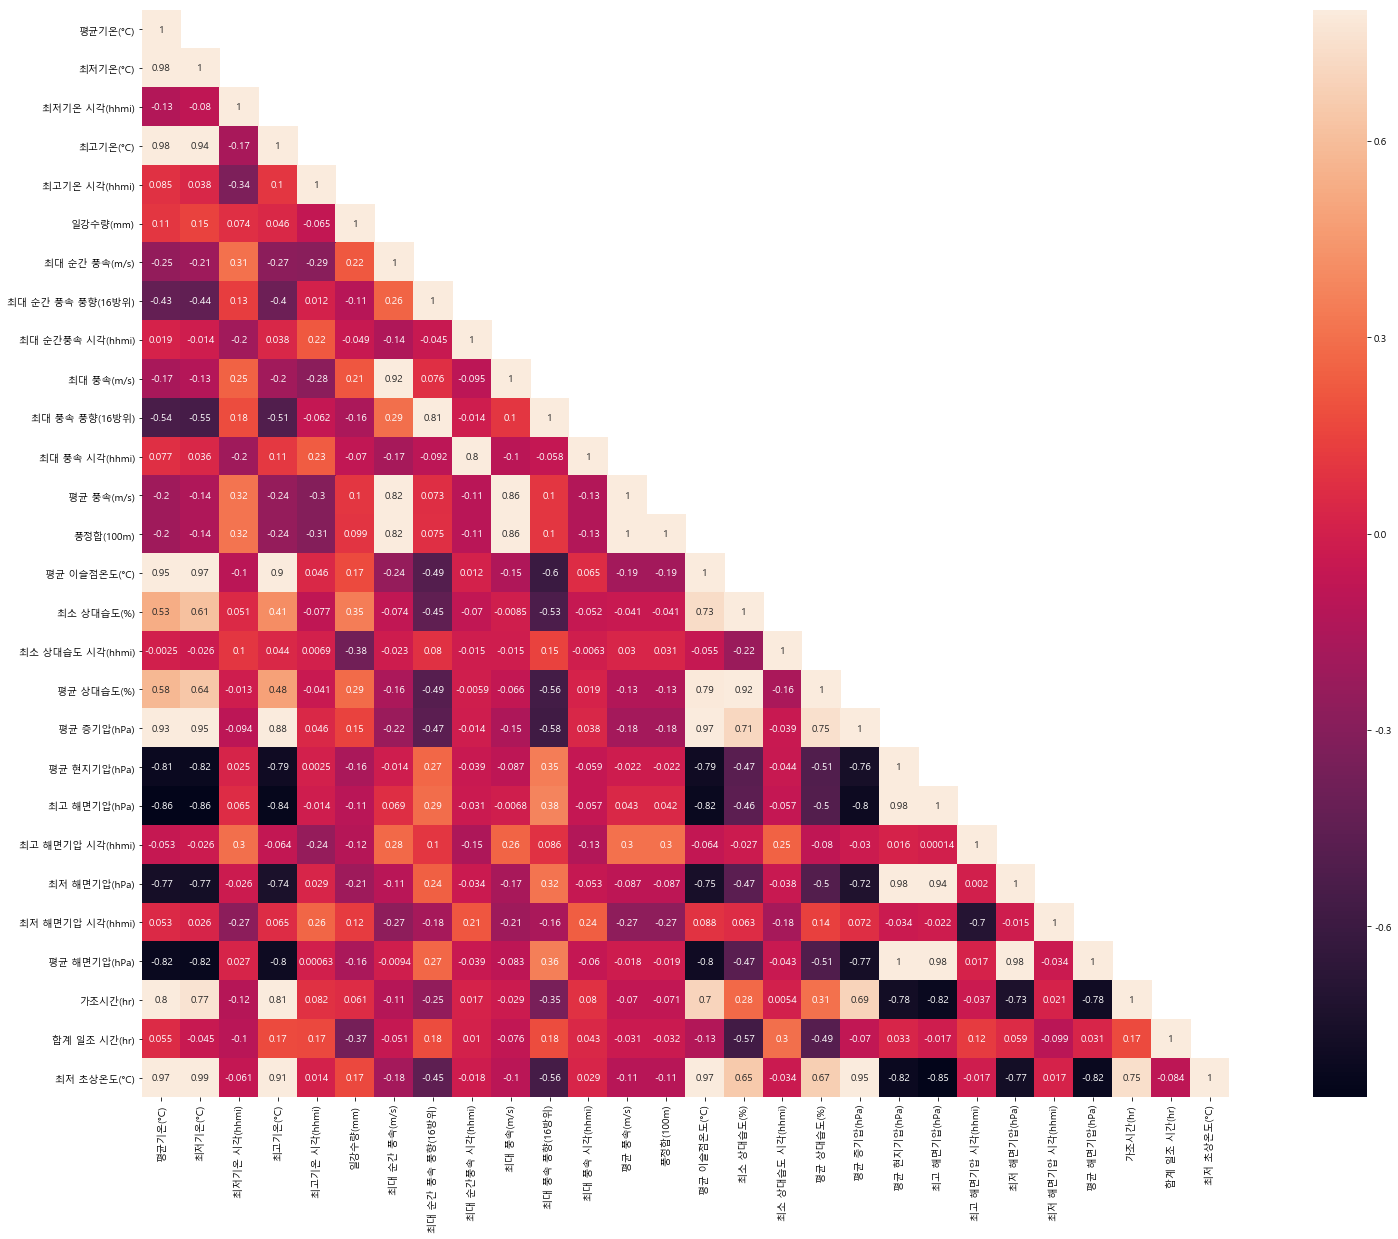

In [179]:
fig, ax= plt.subplots(figsize = (35,25))
fig.set_size_inches(30,20)
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)

In [180]:
import numpy as np
from sklearn.model_selection import train_test_split

In [181]:
len(wando)

382

In [182]:
len(solar_y)

382

In [183]:
382 * 0.75

286.5

In [184]:
X_train = wando[0:286]
X_test = wando[286:]
y_train = solar_y[0:286]
y_test = solar_y[286:]

In [185]:
wando.head()

,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),일강수량(mm),최대 순간 풍속(m/s),최대 순간 풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),...,평균 증기압(hPa),평균 현지기압(hPa),최고 해면기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),합계 일조 시간(hr),최저 초상온도(°C)
0,23.9,21.5,1,26.2,1814,51.2,15.7,160,2353,9.2,...,29.4,1003.3,1011.6,1,1004.9,2021,1007.3,14.4,0.0,22.3
1,23.0,21.6,1142,26.0,1,55.7,21.5,180,226,10.4,...,27.8,1002.3,1008.7,2337,1003.8,211,1006.3,14.4,0.4,22.1
2,21.0,20.1,1530,22.9,57,44.9,6.9,70,1623,5.2,...,24.5,1005.5,1011.4,856,1008.1,1822,1009.6,14.4,0.0,20.8
3,25.2,21.2,1,29.6,1554,0.4,11.3,90,1902,6.0,...,31.8,1005.9,1011.6,2331,1008.6,308,1009.9,14.4,2.4,21.7
4,27.6,22.4,249,31.3,1156,0.1,11.8,110,1010,6.6,...,35.5,1008.4,1014.0,2305,1011.3,433,1012.4,14.4,8.2,23.3


In [186]:
# X_train, X_test, y_train, y_test = train_test_split(wando, solar_y , test_size=0.25, random_state=42)

In [187]:
X_train.head()

,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),일강수량(mm),최대 순간 풍속(m/s),최대 순간 풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),...,평균 증기압(hPa),평균 현지기압(hPa),최고 해면기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),합계 일조 시간(hr),최저 초상온도(°C)
0,23.9,21.5,1,26.2,1814,51.2,15.7,160,2353,9.2,...,29.4,1003.3,1011.6,1,1004.9,2021,1007.3,14.4,0.0,22.3
1,23.0,21.6,1142,26.0,1,55.7,21.5,180,226,10.4,...,27.8,1002.3,1008.7,2337,1003.8,211,1006.3,14.4,0.4,22.1
2,21.0,20.1,1530,22.9,57,44.9,6.9,70,1623,5.2,...,24.5,1005.5,1011.4,856,1008.1,1822,1009.6,14.4,0.0,20.8
3,25.2,21.2,1,29.6,1554,0.4,11.3,90,1902,6.0,...,31.8,1005.9,1011.6,2331,1008.6,308,1009.9,14.4,2.4,21.7
4,27.6,22.4,249,31.3,1156,0.1,11.8,110,1010,6.6,...,35.5,1008.4,1014.0,2305,1011.3,433,1012.4,14.4,8.2,23.3


In [188]:
from statsmodels.datasets.longley import load_pandas
wando.head(1)

,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),일강수량(mm),최대 순간 풍속(m/s),최대 순간 풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),...,평균 증기압(hPa),평균 현지기압(hPa),최고 해면기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),합계 일조 시간(hr),최저 초상온도(°C)
0,23.9,21.5,1,26.2,1814,51.2,15.7,160,2353,9.2,...,29.4,1003.3,1011.6,1,1004.9,2021,1007.3,14.4,0.0,22.3


In [189]:
solar_y.head(1)

,충전시간발전량
0,140.5


In [190]:
data = wando.copy()
data['발전량'] = solar_y

In [191]:
data.head()

,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),일강수량(mm),최대 순간 풍속(m/s),최대 순간 풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),...,평균 현지기압(hPa),최고 해면기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),합계 일조 시간(hr),최저 초상온도(°C),발전량
0,23.9,21.5,1,26.2,1814,51.2,15.7,160,2353,9.2,...,1003.3,1011.6,1,1004.9,2021,1007.3,14.4,0.0,22.3,140.5
1,23.0,21.6,1142,26.0,1,55.7,21.5,180,226,10.4,...,1002.3,1008.7,2337,1003.8,211,1006.3,14.4,0.4,22.1,276.8
2,21.0,20.1,1530,22.9,57,44.9,6.9,70,1623,5.2,...,1005.5,1011.4,856,1008.1,1822,1009.6,14.4,0.0,20.8,107.8
3,25.2,21.2,1,29.6,1554,0.4,11.3,90,1902,6.0,...,1005.9,1011.6,2331,1008.6,308,1009.9,14.4,2.4,21.7,1012.9
4,27.6,22.4,249,31.3,1156,0.1,11.8,110,1010,6.6,...,1008.4,1014.0,2305,1011.3,433,1012.4,14.4,8.2,23.3,1975.6


## 5. Feature Engineering

### [5-1] 다중공선성 확인 

https://datascienceschool.net/view-notebook/36176e580d124612a376cf29872cd2f0/

VIF 가장 높은 feature 하나 줄이고 - 결과 확인 - ... - 퍼포먼스가 떨어지기 전까지만!

실생활에 적용할 때, 적은 feature로 Y값을 예측하는 게 효율적임
- 복잡한 모델일수록 안좋다.
- 데이터 양이 늘어나면 시간도 오래걸리니까!
- 또한 feature 개수가 많으면 과적합 될 수 있다. 즉, 예측이 잘 안될 수 있다.

In [192]:
# sns.pairplot(data)
# plt.show()

In [193]:
wando.columns

Index(['평균기온(°C)', '최저기온(°C)', '최저기온 시각(hhmi)', '최고기온(°C)', '최고기온 시각(hhmi)',
       '일강수량(mm)', '최대 순간 풍속(m/s)', '최대 순간 풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)',
       '최대 풍속(m/s)', '최대 풍속 풍향(16방위)', '최대 풍속 시각(hhmi)', '평균 풍속(m/s)',
       '풍정합(100m)', '평균 이슬점온도(°C)', '최소 상대습도(%)', '최소 상대습도 시각(hhmi)',
       '평균 상대습도(%)', '평균 증기압(hPa)', '평균 현지기압(hPa)', '최고 해면기압(hPa)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)',
       '가조시간(hr)', '합계 일조 시간(hr)', '최저 초상온도(°C)'],
      dtype='object')

### feature drop할 때마다 공선성도 다시 renew 해야한다!

feature 줄어들 때마다 공선성의 정도가 달라짐!

In [358]:
wando2 = wando.copy()
solar_y2 = solar_y.copy()

wando3 = wando.copy()
solar_y3 = solar_y.copy()

wando4 = wando.copy()
solar_y4 = solar_y.copy()

In [253]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    wando2.values, i) for i in range(wando2.shape[1])]
vif["features"] = wando2.columns
vif.head(3)

,VIF Factor,features
0,3171.461314,평균기온(°C)
1,579.049880,최저기온(°C)
2,3.130106,최저기온 시각(hhmi)


In [254]:
vif.sort_values(by=['VIF Factor'], ascending = False).head(3)

,VIF Factor,features
19,6.317442e+08,평균 현지기압(hPa)
24,6.301155e+08,평균 해면기압(hPa)
22,1.783477e+06,최저 해면기압(hPa)


In [255]:
wando2.drop(['평균 현지기압(hPa)'],axis=1, inplace=True) # RMSE 변화 0.1026 - 0.1026

In [256]:
wando2.drop(['평균 해면기압(hPa)'],axis=1, inplace=True) # RMSE 변화 0.1026 - 0.1047

In [257]:
# wando2.drop(['최저 해면기압(hPa)'],axis=1, inplace=True) # RMSE 변화 0.1047 - 0.1042

In [258]:
# wando2.drop(['최고 해면기압(hPa)'],axis=1, inplace=True) # RMSE 변화 0.1042 - 0.1042

In [259]:
# wando2.drop(['풍정합(100m)'],axis=1, inplace=True) # RMSE 변화 0.1042 - 0.1041

In [260]:
# wando2.drop(['평균 풍속(m/s)'],axis=1, inplace=True) # RMSE 변화 0.1041- 0.1022


In [261]:
wando.columns

Index(['평균기온(°C)', '최저기온(°C)', '최저기온 시각(hhmi)', '최고기온(°C)', '최고기온 시각(hhmi)',
       '일강수량(mm)', '최대 순간 풍속(m/s)', '최대 순간 풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)',
       '최대 풍속(m/s)', '최대 풍속 풍향(16방위)', '최대 풍속 시각(hhmi)', '평균 풍속(m/s)',
       '풍정합(100m)', '평균 이슬점온도(°C)', '최소 상대습도(%)', '최소 상대습도 시각(hhmi)',
       '평균 상대습도(%)', '평균 증기압(hPa)', '평균 현지기압(hPa)', '최고 해면기압(hPa)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)',
       '가조시간(hr)', '합계 일조 시간(hr)', '최저 초상온도(°C)'],
      dtype='object')

### [5-2] 스케일

In [350]:
from sklearn.preprocessing import MinMaxScaler

In [351]:
scaler = MinMaxScaler()

In [352]:
wando2 = scaler.fit_transform(wando2)

In [353]:
solar_y2 = scaler.fit_transform(solar_y2)

### 셋 분리

In [355]:
X_train = wando2[0:286]
X_test = wando2[286:]
y_train = solar_y2[0:286]
y_test = solar_y2[286:]


X_train2 = wando3[0:286]
X_test2 = wando3[286:]
y_train2 = solar_y3[0:286]
y_test2 = solar_y3[286:]

In [356]:
X_train2_v = X_train2.values
X_test2_v = X_test2.values
y_train2_v = y_train2.values
y_test2_v = y_test2.values

## 6. 모델링

### [6-1] 선형회귀

train_test split 해서 index 마구마구 섞여있음 - 인덱스 정렬 필요

In [324]:
# X_train.sort_index(inplace=True)
# X_test.sort_index(inplace=True)
# y_train.sort_index(inplace=True)
# y_test.sort_index(inplace=True)

In [325]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model2 = LinearRegression(fit_intercept=True)

In [326]:
model = model.fit(X_train, y_train)
model2 = model2.fit(X_train2, y_train2)

In [327]:
len(y_test)

96

In [328]:
len(y_pred)

96

In [329]:
y_pred = model.predict(X_test)
y_pred[0:5]

#y_pred_r = scaler.inverse_transform(y_pred) # 스케일한 경우 원래값 복원

#y_pred_r

array([[0.92671177],
       [0.7112739 ],
       [0.67390907],
       [0.64417529],
       [0.24979585]])

In [330]:
y_pred2 = model2.predict(X_test2)

In [331]:
from sklearn.metrics import mean_squared_error
from math import sqrt

### 결과 확인

In [332]:
mean_squared_error(y_test, y_pred)

0.010975821551163409

In [333]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

0.10476555517517869

In [334]:
df_p = pd.DataFrame(y_pred)
df_p.columns = ['y_pred']
df_p.head()

,y_pred
0,0.926712
1,0.711274
2,0.673909
3,0.644175
4,0.249796


In [335]:
df_t= pd.DataFrame(y_test)
df_t.columns = ['y_test']

df_t.head()

,y_test
0,0.909387
1,0.821212
2,0.814080
3,0.951404
4,0.035181


In [336]:
df = pd.concat([df_t, df_p], axis=1)
df.head()

,y_test,y_pred
0,0.909387,0.926712
1,0.821212,0.711274
2,0.814080,0.673909
3,0.951404,0.644175
4,0.035181,0.249796


In [338]:
df_p2 = pd.DataFrame(y_pred2)
df_p2.columns = ['y_pred2']
df_p2.head()

,y_pred2
0,2509.490673
1,1895.009190
2,1862.588923
3,1801.621483
4,513.942925


In [339]:
df_t2= pd.DataFrame(y_test2_v)
df_t2.columns = ['y_test2']
df_t2.head()

,y_test2
0,2461.7
1,2223.1
2,2203.8
3,2575.4
4,96.1


In [340]:
df2 = pd.concat([df_t2, df_p2], axis=1)
df2.head()

,y_test2,y_pred2
0,2461.7,2509.490673
1,2223.1,1895.009190
2,2203.8,1862.588923
3,2575.4,1801.621483
4,96.1,513.942925


In [303]:
len(df)

96

In [241]:
y_test = df['y_test'].values
y_pred = df['y_pred'].values

In [342]:
y_test2 = df2['y_test2'].values
y_pred2 = df2['y_pred2'].values

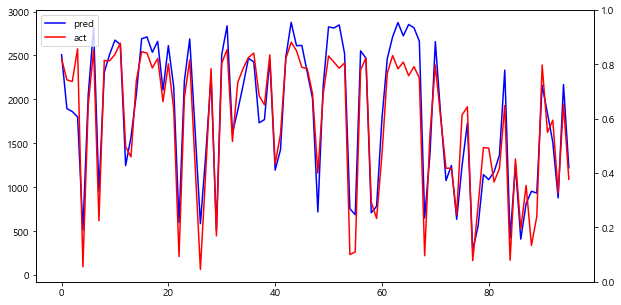

In [344]:
fig, loss_ax = plt.subplots(figsize=(10,5))

acc_ax = loss_ax.twinx()

pred = y_pred2

loss_ax.plot(pred, 'b', label='pred')

loss_ax.plot(y_test2, 'r', label='act')

loss_ax.legend(loc='upper left')

plt.show()

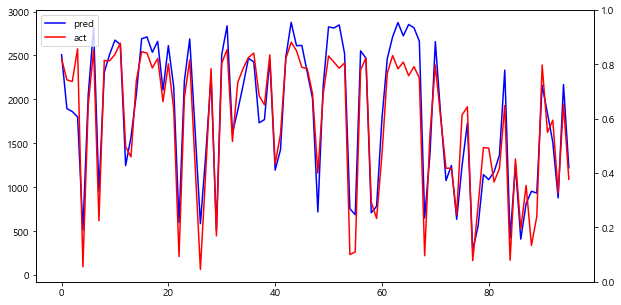

In [343]:
fig, loss_ax = plt.subplots(figsize=(10,5))

acc_ax = loss_ax.twinx()

pred = y_pred2

loss_ax.plot(pred, 'b', label='pred')

loss_ax.plot(y_test2, 'r', label='act')

loss_ax.legend(loc='upper left')

plt.show()

### [6-2] LSTM

In [345]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

In [362]:
wando4.head(2)

,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),일강수량(mm),최대 순간 풍속(m/s),최대 순간 풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),...,평균 증기압(hPa),평균 현지기압(hPa),최고 해면기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),합계 일조 시간(hr),최저 초상온도(°C)
0,23.9,21.5,1,26.2,1814,51.2,15.7,160,2353,9.2,...,29.4,1003.3,1011.6,1,1004.9,2021,1007.3,14.4,0.0,22.3
1,23.0,21.6,1142,26.0,1,55.7,21.5,180,226,10.4,...,27.8,1002.3,1008.7,2337,1003.8,211,1006.3,14.4,0.4,22.1


In [363]:
solar_y4.head(2)

,충전시간발전량
0,140.5
1,276.8


In [399]:
wando4 = scaler.fit_transform(wando4)
solar_y4 =scaler.fit_transform(solar_y4)

In [389]:
X_train4 = wando4[0:286]
X_test4 = wando4[286:]
y_train4 = solar_y4[0:286]
y_test4 = solar_y4[286:]

In [390]:
# X_train_v = X_train4.values
# X_test_v = X_test4.values
# y_train_v = y_train4.values
# y_test_v = y_test4.values

In [406]:
X_train_r = X_train4.reshape(X_train4.shape[0], 28, 1)
X_test_r = X_test4.reshape(X_test4.shape[0], 28, 1)

In [407]:
K.clear_session()
model = Sequential()
model.add(LSTM(20, input_shape=(28,1))) # shape는 차원맞추는 것
model.add(Dense(1))  #Dense : output 개수 

In [408]:
# model.compile(loss='rmse', optimizer='adam')
# model.fit(X_train_t, y_train, epochs = 3, batch_size=100, verbose=1)

In [409]:
# model.compile(optimizer = "rmsprop", loss = root_mean_squared_error, metrics =["accuracy"])
model.compile(optimizer = "adam", loss = 'mean_squared_error')

model.fit(X_train_r, y_train4, epochs = 100, batch_size=10, verbose=1)

Epoch 1/100
286/286 [==============================] - 2s 6ms/step - loss: 0.2266
Epoch 2/100
286/286 [==============================] - 1s 2ms/step - loss: 0.0774
Epoch 3/100
286/286 [==============================] - 1s 2ms/step - loss: 0.0719
Epoch 4/100
286/286 [==============================] - 1s 2ms/step - loss: 0.0705
Epoch 5/100
286/286 [==============================] - 1s 2ms/step - loss: 0.0705
Epoch 6/100
286/286 [==============================] - 1s 3ms/step - loss: 0.0685
Epoch 7/100
286/286 [==============================] - 1s 3ms/step - loss: 0.0668
Epoch 8/100
286/286 [==============================] - 1s 3ms/step - loss: 0.0640
Epoch 9/100
286/286 [==============================] - 1s 3ms/step - loss: 0.0617
Epoch 10/100
286/286 [==============================] - 1s 3ms/step - loss: 0.0590
Epoch 11/100
286/286 [==============================] - 1s 3ms/step - loss: 0.0566
Epoch 12/100
286/286 [==============================] - 1s 3ms/step - loss: 0.0519
Epoch 13/100


286/286 [==============================] - 1s 3ms/step - loss: 0.0070
Epoch 100/100
286/286 [==============================] - 1s 3ms/step - loss: 0.0068


In [410]:
y_pred = model.predict(X_test_r)

### 결과 확인

In [411]:
rmse = sqrt(mean_squared_error(y_test4, y_pred))
rmse

0.09550678469214584

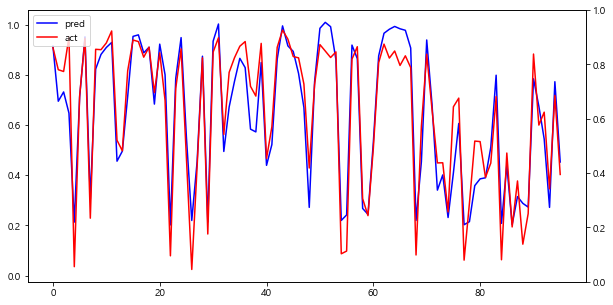

In [413]:
fig, loss_ax = plt.subplots(figsize=(10,5))

acc_ax = loss_ax.twinx()

pred = y_pred

loss_ax.plot(pred, 'b', label='pred')

loss_ax.plot(y_test4, 'r', label='act')

loss_ax.legend(loc='upper left')

plt.show()